# Transformations

변환은 좌표x를 좌표x' 으로 변환하는 것

수식에 대한 부분은 다음과 같다
http://blog.daum.net/shksjy/235

- 강체 변환(Ridid-Body) : 크기 및 각도가 보존(ex: Translation, Rotation)
- 유사 변환(Similarity) : 크기는 변하고 각도는 보존(ex: Scaling)
- 선형 변환(Linear) : Vector 공간에서의 이동.
- Affine : 선형 변환+이동 변환. 선의 수평성은 유지(ex: 사각형 -> 평행사변형)
- perspective : Affine변환에 수평성이 유지되지 않음 (원근변환)

## Scaling
이미지의 사이즈를 변하게 하는 것
`cv2.resize()`함수로 적용
픽셀 사이 값을 적용해야 하는데, 이럴 때 '보간법'이 적용된다.
많이 사용하는 보간법
- `cv2.INTER_AREA` : 사이즈를 줄일 때
- `cv2.INTER_CUBIC` : 사이즈를 키울 때
- `cv2.INTER_LINEAR` : 사이즈를 키울 때

자세한 설명은 다음 링크를 참조
https://m.blog.naver.com/vps32/221762092250

`cv2.resize(img, dsize, fx, fy, interpolation)`
- img : 대상 이미지
- dsize : manual Size, tuple로 적용
- fx : 가로 사이즈 배수 (2인 경우 2배)
- fy : 세로 사이즈 배수
- interpolation : 사용할 보간법

In [5]:
import cv2
import numpy as np

img = cv2.imread("Images/Sample_mili.jpg")
img.shape

(160, 160, 3)

In [9]:
# 이미지 행, 열
height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy = 0.5, interpolation=cv2.INTER_AREA)

# Manual Size 
zoom1 = cv2.resize(img, (width * 2, height*2), interpolation=cv2.INTER_CUBIC)

zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

In [10]:
zoom2.shape

(320, 320, 3)

In [11]:
cv2.imshow("Original", img)
cv2.imshow("Shrink", shrink)
# cv2.imshow("zoom1", zoom1)
cv2.imshow("zoom2", zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Translation
이미지의 위치 변환

`cv2.warpAffine(src, M, dsize)`
- src : 이미지
- M : 변환 행렬
- dsize : output Image size

In [13]:
import cv2
import numpy as np

img = cv2.imread("Images/Sample_mili.jpg")

rows, cols = img.shape[:2]

# 변환 행렬 (x축으로 10, y축으로 20)
M = np.float32([[1,0,10],[0,1,20]])

dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imshow('Original', img)
cv2.imshow("Translation", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Rotation
물체를 평면상의 한 점을 중심으로 회전하는 변환 (시계방향)

`cv2.getRotationMatrix2D(center,angle, scale)`
- center : 이미지의 중심 좌표
- angle : 회전 각도
- scale : scale factor

결과 : 변환 행렬을 반환
이렇게 나온 행렬을 `cv2.wrapAffine()`

In [1]:
import cv2

img = cv2.imread("Images/Sample_mili.jpg")

rows, cols = img.shape[:2]

# 이미지의 중심을 기준으로 90도 회전, 0.5배
M = cv2.getRotationMatrix2D((rows/2,cols/2), 90, 0.5)

dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow("original", img)
cv2.imshow("Rotation", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Affine Transformation

선의 평행성은 유지하면서 이미지를 변환하는 작업
3개의 매치되는 점이 있으면 변환행렬을 만들수 있다

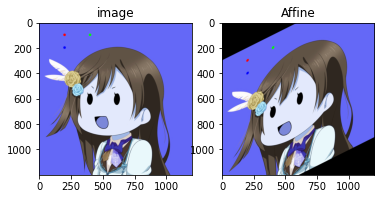

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Sample_nizi3.png")
rows, cols, ch = img.shape

pts1 = np.float32([[200, 100], [400, 100], [200,200]])
pts2 = np.float32([[200, 300], [400, 200], [200,400]])

# pts1의 좌표에 표시.
cv2.circle(img, (200,100), 10, (255, 0,0), -1) # -1이면 원 안쪽을 채움
cv2.circle(img, (400,100), 10, (0,255,0), -1)
cv2.circle(img, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title("image")

plt.subplot(122)
plt.imshow(dst)
plt.title("Affine")

plt.show()

## perspective Transformation

직선의 성질만 유지, 선의 평행성은 유지되지 않음
4개의 input 점과 이동할 output점
`cv2.getPerspectiveTransform()` 으로 나타냄


<function matplotlib.pyplot.show(close=None, block=None)>

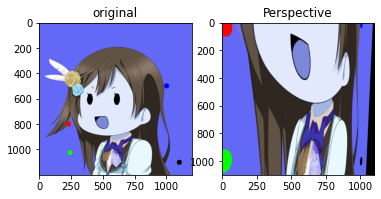

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images/Sample_nizi3.png')

pts1 = np.float32([[230, 800], [243,1025], [1000,500],[1100,1100]])

# 이동점
pts2 = np.float32([[10,10], [10,1000],[1000,10], [1000,1000]] )

cv2.circle(img, (230, 800), 20, (255,0,0), -1)
cv2.circle(img, (243, 1025), 20, (0,255,0), -1)
cv2.circle(img, (1000, 500), 20, (0,0,255), -1)
cv2.circle(img, (1100, 1100), 20, (0,0,0), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100, 1100))

plt.subplot(121)
plt.imshow(img)
plt.title("original")

plt.subplot(122)
plt.imshow(dst)
plt.title("Perspective")

plt.show